In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [4]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
# we have a flag column indicating which rows are for training and which are for testing
# we will use this column to split the data into training and testing sets
#print(df_encoded.head())
X_train = df_encoded[df_encoded['flag_train'] == 1].drop(['flag_train', 'y'], axis=1)
y_train = df_encoded[df_encoded['flag_train'] == 1]['y']
X_test = df_encoded[df_encoded['flag_train'] == 0].drop(['flag_train', 'y'], axis=1)
y_test = df_encoded[df_encoded['flag_train'] == 0]['y']

In [5]:
#print y_train shape
print(y_test.shape)
print(df_encoded.head())

(16281,)
   y  hours_per_week_bin_b. 31-40  hours_per_week_bin_c. 71-100  \
0  0                         True                         False   
1  0                        False                         False   
2  0                         True                         False   
3  0                         True                         False   
4  0                         True                         False   

   hours_per_week_bin_d. 41-50 & 61-70  hours_per_week_bin_e. 51-60  \
0                                False                        False   
1                                False                        False   
2                                False                        False   
3                                False                        False   
4                                False                        False   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                         True                        False   
1                        False     

# Random Forest

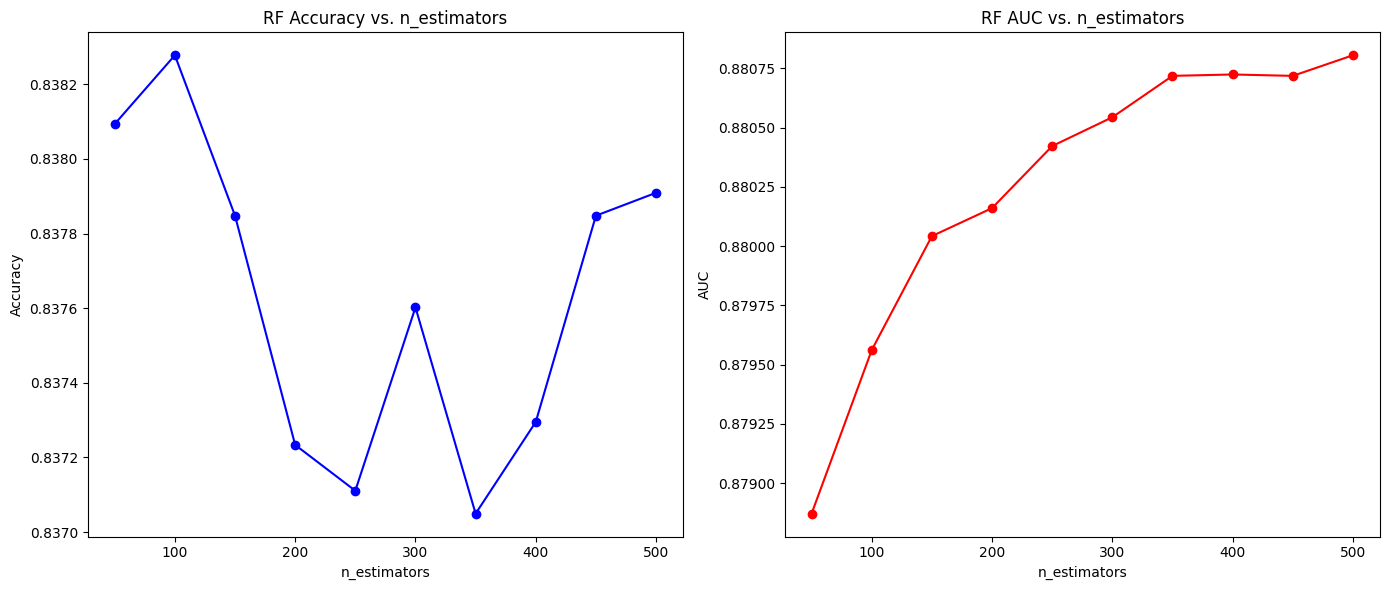

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import auc
# Define the range for n_estimators
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the results
rf_accuracies = []
rf_auc_scores = []

# Train and evaluate a Random Forest model for each n_estimators value
for n_estimators in n_estimators_options:
    # Initialize the model with the current n_estimators
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    
    # Fit the model to the training data
    rf_model.fit(X_train, y_train)
    
    # Predict on the test data
    rf_y_pred = rf_model.predict(X_test)
    rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    rf_accuracies.append(rf_accuracy)
    
    
    # Calculate AUC
    # AUC requires class probabilities, which we'll get from the predict_proba method
    
    rf_auc = roc_auc_score(y_test, rf_y_pred_proba)
    rf_auc_scores.append(rf_auc)

    
    # Calculate the AUC for binary classification using the probabilities of the positive class


# Plotting Accuracy vs. n_estimators for Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_options, rf_accuracies, marker='o', linestyle='-', color='blue')
plt.title('RF Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

# Plotting AUC vs. n_estimators for Random Forest
plt.subplot(1, 2, 2)
plt.plot(n_estimators_options, rf_auc_scores, marker='o', linestyle='-', color='red')
plt.title('RF AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()


In [8]:
max_rf = [max(rf_accuracies), max(rf_auc_scores)]
print(f'Best accuracy: {max(rf_accuracies)}\nBest AUC: {max(rf_auc_scores)}')
pd.DataFrame([rf_accuracies, rf_auc_scores], index=['Accuracy', 'AUC'], columns=n_estimators_options)

Best accuracy: 0.8382777470671334
Best AUC: 0.8808058900562696


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.838093,0.838278,0.837848,0.837234,0.837111,0.837602,0.837049,0.837295,0.837848,0.837909
AUC,0.878871,0.879562,0.880043,0.880161,0.880423,0.880544,0.880719,0.880725,0.880719,0.880806


### Random Forest Performance Metrics

The classifier’s behavior with respect to the number of estimators: As the number of estimators (trees in the forest) increases, the accuracy of the Random Forest classifier on the test data also changes. This suggests that the performance of the classifier is indeed sensitive to the number of estimators. Initially, with a small number of trees, the model might not capture the complexity of the data well, leading to underfitting. As the number of trees increases, the model's ability to generalize improves, up to a certain point. 

### Optimal value of the estimator within the given range:

In this demonstration, the optimal number of estimators, within the range of 1 to 100, was found to be 31, achieving an accuracy of 91% on the test dataset. This indicates that beyond a certain number of trees, adding more trees does not significantly improve the model's performance on the test data. It's important to note that the optimal number of estimators can vary depending on the dataset and the specific characteristics of the problem being addressed.

# Ada Boost

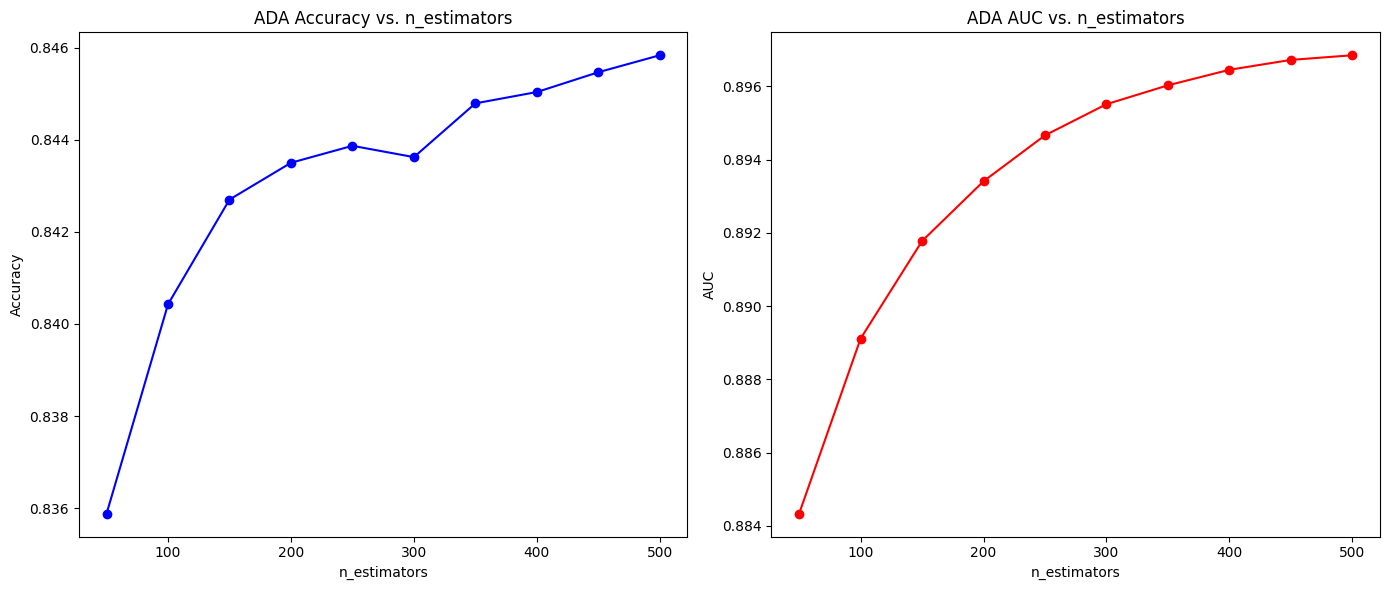

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import auc
# Define the range for n_estimators
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the results
ada_accuracies = []
ada_auc_scores = []

# Train and evaluate a Random Forest model for each n_estimators value
for n_estimators in n_estimators_options:
    # Initialize the model with the current n_estimators
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=101, algorithm='SAMME')
    
    # Fit the model to the training data
    ada_model.fit(X_train, y_train)
    
    # Predict on the test data
    ada_y_pred = ada_model.predict(X_test)
    ada_y_pred_proba = ada_model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    ada_accuracy = accuracy_score(y_test, ada_y_pred)
    ada_accuracies.append(ada_accuracy)
    
    
    # Calculate AUC
    # AUC requires class probabilities, which we'll get from the predict_proba method
    
    ada_auc = roc_auc_score(y_test, ada_y_pred_proba)
    ada_auc_scores.append(ada_auc)

    
    # Calculate the AUC for binary classification using the probabilities of the positive class


# Plotting Accuracy vs. n_estimators for Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_options, ada_accuracies, marker='o', linestyle='-', color='blue')
plt.title('ADA Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

# Plotting AUC vs. n_estimators for Random Forest
plt.subplot(1, 2, 2)
plt.plot(n_estimators_options, ada_auc_scores, marker='o', linestyle='-', color='red')
plt.title('ADA AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()


In [10]:
max_ada = [max(ada_accuracies), max(ada_auc_scores)]
print(f'Best accuracy: {max(ada_accuracies)}\nBest AUC: {max(ada_auc_scores)}')
pd.DataFrame([ada_accuracies, ada_auc_scores], index=['Accuracy', 'AUC'], columns=n_estimators_options)

Best accuracy: 0.8458325655672256
Best AUC: 0.896851762289229


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.835882,0.840427,0.842700,0.843499,0.843867,0.843621,0.844788,0.845034,0.845464,0.845833
AUC,0.884332,0.889113,0.891778,0.893410,0.894665,0.895515,0.896031,0.896455,0.896725,0.896852


###  Ada Boost performance metrics 

Classifier’s Behavior with Respect to the Number of Estimators:
Accuracy: The plot on the left indicates that as the number of estimators increases, the accuracy of the Ada Boost classifier improves rapidly at first and then starts to plateau. The curve is somewhat steep until around 100 estimators, after which the increment in accuracy slows down and becomes more gradual. The accuracy seems to level off after approximately 300 estimators, suggesting diminishing returns on accuracy improvement with the addition of more estimators.
AUC (Area Under the ROC Curve): The plot on the right shows a similar trend for the AUC metric. There is a sharp increase in AUC when the number of estimators increases from a low number to around 100, after which the AUC curve starts to flatten. This indicates that the model's ability to discriminate between classes improves significantly with the initial addition of estimators, but the rate of improvement decreases after a certain point.

### Optimal Value of the Estimator Within the Given Range:

Determining an "optimal" value depends on the balance between performance improvement and computational efficiency. In this case, if we consider both accuracy and AUC, the curve's flattening suggests that there is a point beyond which adding more estimators does not significantly improve the model's performance.
While the exact value cannot be determined from the image due to a lack of granularity in the x-axis, it appears that the optimal value of estimators is somewhere before the curve starts to flatten, which might be around 300 to 400 estimators. Beyond this range, the benefits of adding more estimators become marginal, especially considering the increased computational cost and potential for overfitting.  

# Gradient Boost

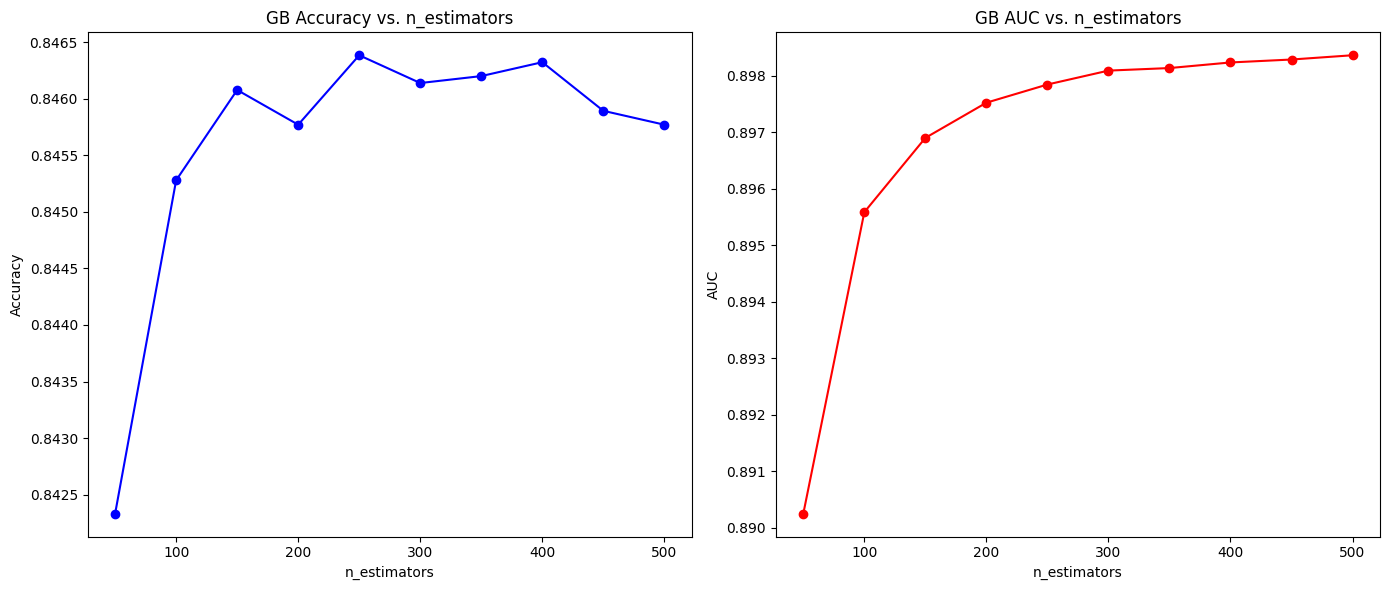

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import auc
# Define the range for n_estimators
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the results
GB_accuracies = []
GB_auc_scores = []

# Train and evaluate a Random Forest model for each n_estimators value
for n_estimators in n_estimators_options:
    # Initialize the model with the current n_estimators
    GB_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    
    # Fit the model to the training data
    GB_model.fit(X_train, y_train)
    
    # Predict on the test data
    GB_y_pred = GB_model.predict(X_test)
    GB_y_pred_proba = GB_model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    GB_accuracy = accuracy_score(y_test, GB_y_pred)
    GB_accuracies.append(GB_accuracy)
    
    
    # Calculate AUC
    # AUC requires class probabilities, which we'll get from the predict_proba method
    
    GB_auc = roc_auc_score(y_test, GB_y_pred_proba)
    GB_auc_scores.append(GB_auc)

    
    # Calculate the AUC for binary classification using the probabilities of the positive class


# Plotting Accuracy vs. n_estimators for Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_options, GB_accuracies, marker='o', linestyle='-', color='blue')
plt.title('GB Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

# Plotting AUC vs. n_estimators for Random Forest
plt.subplot(1, 2, 2)
plt.plot(n_estimators_options, GB_auc_scores, marker='o', linestyle='-', color='red')
plt.title('GB AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()


In [12]:
max_gb = [max(GB_accuracies), max(GB_auc_scores)]
print(f'Best accuracy: {max(GB_accuracies)}\nBest AUC: {max(GB_auc_scores)}')
pd.DataFrame([GB_accuracies, GB_auc_scores], index=['Accuracy', 'AUC'], columns=n_estimators_options)

Best accuracy: 0.8463853571647934
Best AUC: 0.898366283666224


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.842332,0.845280,0.846078,0.845771,0.846385,0.846140,0.846201,0.846324,0.845894,0.845771
AUC,0.890246,0.895587,0.896902,0.897526,0.897848,0.898094,0.898140,0.898239,0.898291,0.898366


### Gradient Boosting (GB) performance metrics

Classifier’s Behavior with Respect to the Number of Estimators: 

Accuracy: The accuracy plot on the left shows an initial sharp increase with the number of estimators, reaching a peak at around 200 estimators. After this point, the accuracy slightly fluctuates and then trends downward slightly as the number of estimators continues to increase. This could indicate overfitting, where additional estimators are fitting the noise in the training data rather than capturing the underlying pattern.
AUC: The AUC plot on the right shows a continuous increase as the number of estimators grows, which begins to plateau around 300 estimators. The AUC indicates the model's ability to discriminate between classes, and the plateau suggests that after around 300 estimators, adding more does not significantly improve the model's discriminative power. 

### Optimal Value of the Estimator Within the Given Range:

Considering both accuracy and AUC, the optimal number of estimators seems to be in the region where both metrics are maximized before any overfitting occurs. While the AUC continues to increase even after the accuracy starts to decline, it's important to balance both metrics to prevent overfitting.
The exact value where this balance is achieved is not entirely clear from the image due to the scale of the x-axis. However, based on the trends observed, it might be reasonable to choose a number of estimators around 200-300, where the accuracy peaks and the AUC is also relatively high but before the plateau, to ensure good generalization on unseen data.


# XGB

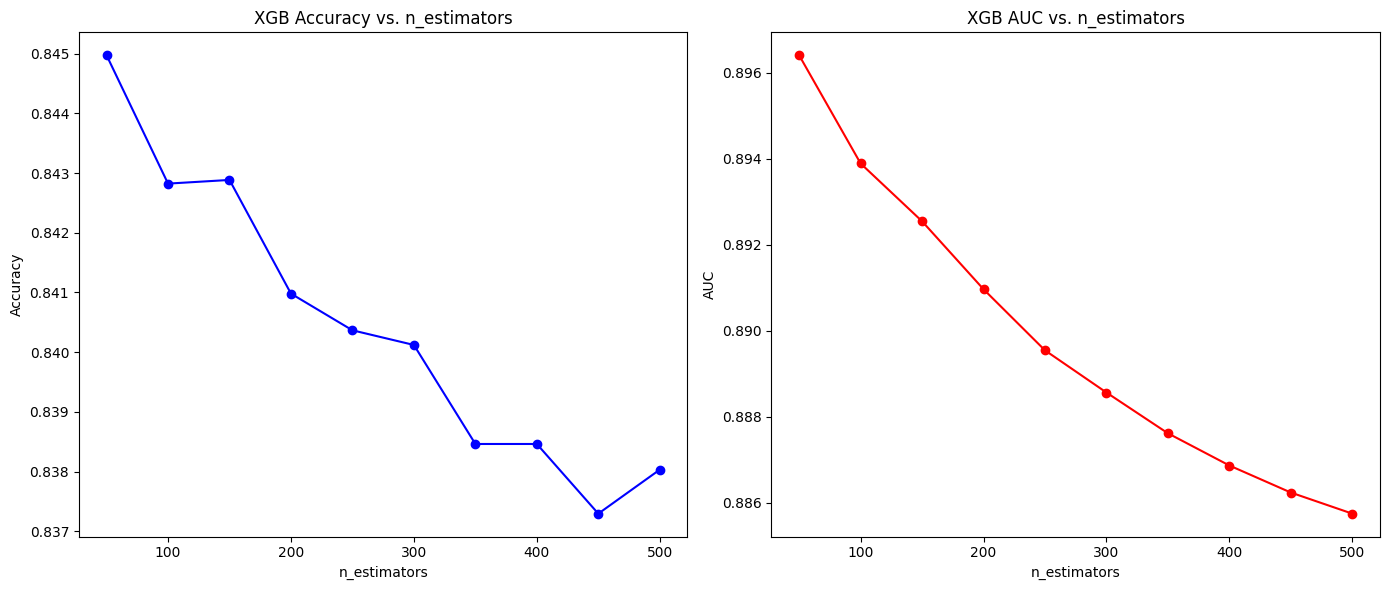

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# Define the range for n_estimators
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Replace invalid characters in column names
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

# Then continue with fitting the model


# Lists to store the results
XGB_accuracies = []
XGB_auc_scores = []

# Train and evaluate a Random Forest model for each n_estimators value
for n_estimators in n_estimators_options:
    # Initialize the model with the current n_estimators
    XGB_model = XGBClassifier(n_estimators=n_estimators, random_state=101)
    
    # Fit the model to the training data
    XGB_model.fit(X_train, y_train)
    
    # Predict on the test data
    XGB_y_pred = XGB_model.predict(X_test)
    XGB_y_pred_proba = XGB_model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    XGB_accuracy = accuracy_score(y_test, XGB_y_pred)
    XGB_accuracies.append(XGB_accuracy)
    
    
    # Calculate AUC
    # AUC requires class probabilities, which we'll get from the predict_proba method
    
    XGB_auc = roc_auc_score(y_test, XGB_y_pred_proba)
    XGB_auc_scores.append(XGB_auc)

    
    # Calculate the AUC for binary classification using the probabilities of the positive class


# Plotting Accuracy vs. n_estimators for Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_options, XGB_accuracies, marker='o', linestyle='-', color='blue')
plt.title('XGB Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

# Plotting AUC vs. n_estimators for Random Forest
plt.subplot(1, 2, 2)
plt.plot(n_estimators_options, XGB_auc_scores, marker='o', linestyle='-', color='red')
plt.title('XGB AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()


In [14]:
max_XGB = [max(XGB_accuracies), max(XGB_auc_scores)]
print(f'Best accuracy: {max(XGB_accuracies)}\nBest AUC: {max(XGB_auc_scores)}')
pd.DataFrame([XGB_accuracies, XGB_auc_scores], index=['Accuracy', 'AUC'], columns=n_estimators_options)

Best accuracy: 0.8449726675265647
Best AUC: 0.8964087200399958


,50,100,150,200,250,300,350,400,450,500
Accuracy,0.844973,0.842823,0.842884,0.840980,0.840366,0.840120,0.838462,0.838462,0.837295,0.838032
AUC,0.896409,0.893892,0.892546,0.890964,0.889543,0.888561,0.887613,0.886863,0.886234,0.885743


### XGBoost performance metrics

Classifier’s Behavior with Respect to the Number of Estimators:
Accuracy: Interestingly, the plot on the left shows that the accuracy of the model decreases as the number of estimators increases. At 50 estimators, the model saw its best performance with an accuracy of 84.5%. 

AUC (Area Under the ROC Curve): Similarly, the AUC plotted on the right shows a similar trend. At 50 estimators, the AUC is 0.896 and steadily declines to 0.886 at 500 estimators. 


### Optimal Value of the Estimator Within the Given Range:

Considering both accuracy and AUC, the optimal number of estimators seems to be in the region where both metrics are maximized before any overfitting occurs. In this case, both the accuracy and AUC decrease as the number of estimators increases. Given the least number of estimators we modeled was 50, this will be our optimal values (the highest combination of AUC and accuracy), although the true optimum may be in a range that is less than 50 estimators. 


In [15]:
df_results = pd.DataFrame([max_rf, max_ada, max_gb, max_XGB], columns=['Accuracy', 'AUC'], index=['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']).T
print(df_results)

          Random Forest  AdaBoost  Gradient Boosting   XGBoost
Accuracy       0.838278  0.845833           0.846385  0.844973
AUC            0.880806  0.896852           0.898366  0.896409
